# Script to compare parameters of 2 emission lines

This script compares the extracted parameters from the line fitting of two different lines and tries fitting periodic functions to check for periodicity. This script should be run after running *single_line_fit* for the two lines to compare.

In [ ]:
%matplotlib inline
import glob, os, sys, timeit
import matplotlib.pyplot as plt
import numpy as np
import pickle
from astropy.time import Time
from scipy.optimize import curve_fit

Choose lines to compare (names of the line)

In [17]:
line1 = "Ha"
line2 = "MgII" 

Load data

In [18]:
with open(rf'dict_param_{line1}.pkl', 'rb') as f:
    dict_1 = pickle.load(f)

with open(rf'dict_param_{line2}.pkl', 'rb') as f:
    dict_2 = pickle.load(f)

Create dictionary of results to plot

In [19]:
br_keys = ["br_1", "br_2"] 
br_keys_Ha = ["br_1", "br_2", "na"]

if line1 == "Ha":
    br_keys_1 = br_keys_Ha
else:
    br_keys_1 = br_keys

if line2 == "Ha":
    br_keys_2 = br_keys_Ha
else:
    br_keys_2 = br_keys

images = ["a", "b"]
epochs = [f"epoch{i}" for i in range(2, 8)]

results_1 = {}
results_2 = {}


for br_key in br_keys_1:
    results_1[br_key] = {}
    for image in images:
        flux, flux_err = [], []
        dwave, dwave_err = [], []
        fwhm, fwhm_err = [], []

        for epoch in epochs:
            data = dict_1[image][epoch][br_key]
            flux.append(data[0][0])
            flux_err.append(data[0][1])
            dwave.append(data[1][0])
            dwave_err.append(data[1][1])
            fwhm.append(data[3][0])
            fwhm_err.append(data[3][1])
        
        results_1[br_key][f"{image}_flux"] = flux
        results_1[br_key][f"{image}_flux_err"] = flux_err
        results_1[br_key][f"{image}_dwave"] = dwave
        results_1[br_key][f"{image}_dwave_err"] = dwave_err
        results_1[br_key][f"{image}_fwhm"] = fwhm
        results_1[br_key][f"{image}_fwhm_err"] = fwhm_err
for br_key in br_keys_2:
    results_2[br_key] = {}
    for image in images:
        flux, flux_err = [], []
        dwave, dwave_err = [], []
        fwhm, fwhm_err = [], []

        for epoch in epochs:
            data = dict_2[image][epoch][br_key]
            flux.append(data[0][0])
            flux_err.append(data[0][1])
            dwave.append(data[1][0])
            dwave_err.append(data[1][1])
            fwhm.append(data[3][0])
            fwhm_err.append(data[3][1])
        results_2[br_key][f"{image}_flux"] = flux
        results_2[br_key][f"{image}_flux_err"] = flux_err
        results_2[br_key][f"{image}_dwave"] = dwave
        results_2[br_key][f"{image}_dwave_err"] = dwave_err
        results_2[br_key][f"{image}_fwhm"] = fwhm
        results_2[br_key][f"{image}_fwhm_err"] = fwhm_err

print(results_1)
print(results_2)


{'br_1': {'a_flux': [2155.44676, 3505.71858, 3235.78976, 3886.12076, 2555.18982, 3284.91341], 'a_flux_err': [53.2877404, 96.2126735, 63.7989088, 116.716275, 120.24363, 76.2145867], 'a_dwave': [-9.990681696, -9.907662276, -7.924581000000001, -11.05897428, -10.169714879999999, -6.409755504], 'a_dwave_err': [0.4742673048, 0.5288369868, 0.3607833672, 0.5894903844, 0.9144605520000001, 0.4691286324000001], 'a_fwhm': [3583.794116868069, 3516.7232101979675, 3753.0417588704927, 3643.9977192984556, 3615.5827482099753, 3683.3523836773347], 'a_fwhm_err': [41.681538029569055, 45.032769819563626, 49.50939664849158, 49.757432716939434, 74.18124992774273, 54.857393649471746], 'b_flux': [564.325452, 890.523369, 808.437661, 999.866666, 806.841214, 715.747024], 'b_flux_err': [31.5542209, 28.4110569, 28.9376231, 45.3606798, 32.8558475, 27.0806362], 'b_dwave': [-5.641448508, -3.093900804, -1.9888565400000002, -2.905942212, -0.5580217584, -2.775867516], 'b_dwave_err': [1.238006592, 0.6172772796, 0.7284708, 

### Plot parameters against time

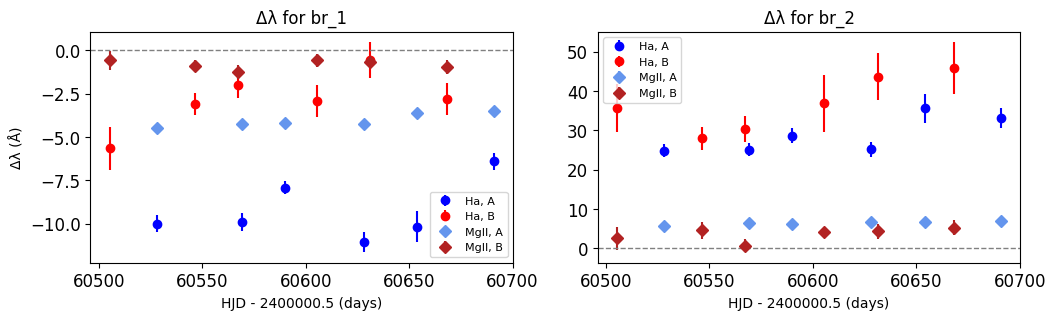

In [20]:
# Time array from dates of data collection (YYYY-MM-DD) in HJD - 2400000.5
dates = ["2024-08-06", "2024-09-16", "2024-10-07", "2024-11-14", "2024-12-10", "2025-01-16"]

t_hjd = Time(dates, format='iso', scale='utc')
t = t_hjd.jd - 2400000.5

# Plot parameters

fig_dl, ax_dl = plt.subplots(nrows=1, ncols=2,figsize = (12,3))
ax_dl[0].errorbar(t, results_1["br_1"]["a_dwave"], yerr = results_1["br_1"]["a_dwave_err"], marker = 'o',linestyle='None', markersize = 6, label = rf'{line1}, A', color = 'blue')
ax_dl[0].errorbar(t-22.7, results_1["br_1"]["b_dwave"], yerr = results_1["br_1"]["b_dwave_err"], marker = 'o', linestyle='None', markersize = 6, label = rf'{line1}, B', color = 'red')
ax_dl[0].errorbar(t, results_2["br_1"]["a_dwave"], yerr = results_2["br_1"]["a_dwave_err"], marker = 'D', linestyle='None', markersize = 6, label = rf'{line2}, A', color = 'cornflowerblue')
ax_dl[0].errorbar(t-22.7, results_2["br_1"]["b_dwave"], yerr = results_2["br_1"]["b_dwave_err"], marker = 'D', linestyle='None', markersize = 6, label = rf'{line2}, B', color = 'firebrick')
ax_dl[0].axhline(y=0, color='gray', linestyle='--', linewidth=1)

ax_dl[1].errorbar(t, results_1["br_2"]["a_dwave"], yerr = results_1["br_2"]["a_dwave_err"], marker = 'o',linestyle='None', markersize = 6, label = rf'{line1}, A', color = 'blue')
ax_dl[1].errorbar(t-22.7, results_1["br_2"]["b_dwave"], yerr = results_1["br_2"]["b_dwave_err"], marker = 'o', linestyle='None', markersize = 6, label = rf'{line1}, B', color = 'red')
ax_dl[1].errorbar(t, results_2["br_2"]["a_dwave"], yerr = results_2["br_2"]["a_dwave_err"], marker = 'D', linestyle='None', markersize = 6, label = rf'{line2}, A', color = 'cornflowerblue')
ax_dl[1].errorbar(t-22.7, results_2["br_2"]["b_dwave"], yerr = results_2["br_2"]["b_dwave_err"], marker = 'D', linestyle='None', markersize = 6, label = rf'{line2}, B', color = 'firebrick')
ax_dl[1].axhline(y=0, color='gray', linestyle='--', linewidth=1)

ax_dl[0].set_xlabel("HJD - 2400000.5 (days)")
ax_dl[1].set_xlabel("HJD - 2400000.5 (days)")
ax_dl[0].set_ylabel("Δλ (Å)")
ax_dl[0].set_title("Δλ for br_1")
ax_dl[1].set_title("Δλ for br_2")
ax_dl[0].tick_params(axis='both', labelsize=12)
ax_dl[1].tick_params(axis='both', labelsize=12)

ax_dl[0].legend(fontsize=8)
ax_dl[1].legend(fontsize=8)
plt.show()

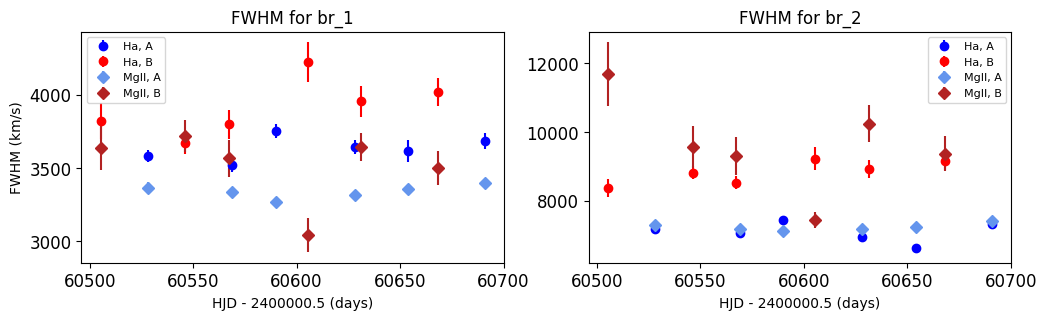

In [21]:
# Plot parameters

fig_fw, ax_fw = plt.subplots(nrows=1, ncols=2,figsize = (12,3))
ax_fw[0].errorbar(t, results_1["br_1"]["a_fwhm"], yerr = results_1["br_1"]["a_fwhm_err"], marker = 'o',linestyle='None', markersize = 6, label = rf'{line1}, A', color = 'blue')
ax_fw[0].errorbar(t-22.7, results_1["br_1"]["b_fwhm"], yerr = results_1["br_1"]["b_fwhm_err"], marker = 'o', linestyle='None', markersize = 6, label = rf'{line1}, B', color = 'red')
ax_fw[0].errorbar(t, results_2["br_1"]["a_fwhm"], yerr = results_2["br_1"]["a_fwhm_err"], marker = 'D', linestyle='None', markersize = 6, label = rf'{line2}, A', color = 'cornflowerblue')
ax_fw[0].errorbar(t-22.7, results_2["br_1"]["b_fwhm"], yerr = results_2["br_1"]["b_fwhm_err"], marker = 'D', linestyle='None', markersize = 6, label = rf'{line2}, B', color = 'firebrick')

ax_fw[1].errorbar(t, results_1["br_2"]["a_fwhm"], yerr = results_1["br_2"]["a_fwhm_err"], marker = 'o',linestyle='None', markersize = 6, label = rf'{line1}, A', color = 'blue')
ax_fw[1].errorbar(t-22.7, results_1["br_2"]["b_fwhm"], yerr = results_1["br_2"]["b_fwhm_err"], marker = 'o', linestyle='None', markersize = 6, label = rf'{line1}, B', color = 'red')
ax_fw[1].errorbar(t, results_2["br_2"]["a_fwhm"], yerr = results_2["br_2"]["a_fwhm_err"], marker = 'D', linestyle='None', markersize = 6, label = 'MgII, A', color = 'cornflowerblue')
ax_fw[1].errorbar(t-22.7, results_2["br_2"]["b_fwhm"], yerr = results_2["br_2"]["b_fwhm_err"], marker = 'D', linestyle='None', markersize = 6, label = rf'{line2}, B', color = 'firebrick')

ax_fw[0].set_xlabel("HJD - 2400000.5 (days)")
ax_fw[1].set_xlabel("HJD - 2400000.5 (days)")
ax_fw[0].set_ylabel("FWHM (km/s)")
ax_fw[0].set_title("FWHM for br_1")
ax_fw[1].set_title("FWHM for br_2")
ax_fw[0].tick_params(axis='both', labelsize=12)
ax_fw[1].tick_params(axis='both', labelsize=12)

ax_fw[0].legend(fontsize=8)
ax_fw[1].legend(fontsize=8)
plt.show()

### Fit periodic function with fixed period

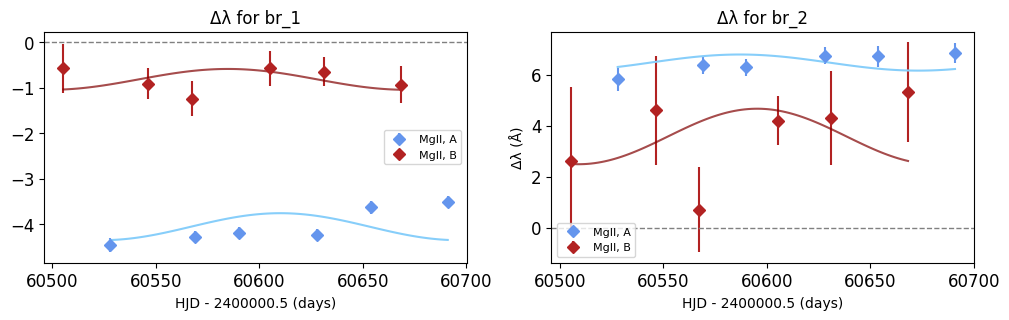

In [50]:
t_sin = np.array(t) -np.array(t)[0]

period = 172.6
# period = 172.6/2
br_keys = ["br_1", "br_2"]

omega = 2*np.pi /period
# Define sinusoidal function to fit (with and without fixing the period)
def sine_func_fixp(t, A, phi, offset):
    return A * np.sin(omega* t + phi) + offset

def sine_func(t, A, omega, phi, offset):
    return A * np.sin(omega* t + phi) + offset

fits_1 = {}
fits_2 = {}
for br_key in br_keys:
    fits_1[br_key] = {}
    dwave_sin_a = np.array(results_1[br_key]["a_dwave"])
    dwave_sin_b = np.array(results_1[br_key]["b_dwave"])
    
    # Initial guess: amplitude, frequency, phase, vertical shift
    A_guess_a = (np.max(dwave_sin_a) - np.min(dwave_sin_a)) / 2
    D_guess_a = np.mean(dwave_sin_a)
    A_guess_b = (np.max(dwave_sin_b) - np.min(dwave_sin_b)) / 2
    D_guess_b = np.mean(dwave_sin_b)
    C_guess = 0
    guess_a = [A_guess_a, C_guess, D_guess_a]
    guess_b = [A_guess_b,C_guess, D_guess_b]

    # Fit the curves
    popt_a, pcov_a = curve_fit(sine_func_fixp, t, dwave_sin_a, p0=guess_a)
    popt_b, pcov_b = curve_fit(sine_func_fixp, t- 22.7, dwave_sin_b, p0=guess_b)

    # Generate fit line
    x_fit_a = np.linspace(min(t_sin), max(t_sin), 100)
    x_fit_b = np.linspace(min(t_sin)-22.7, max(t_sin) -22.7, 100)
    y_fit_a = sine_func_fixp(x_fit_a, *popt_a)
    y_fit_b = sine_func_fixp(x_fit_b, *popt_b)

    fits_1[br_key]["xfit_a"] = x_fit_a 
    fits_1[br_key]["yfit_a"] = y_fit_a
    fits_1[br_key]["xfit_b"] = x_fit_b
    fits_1[br_key]["yfit_b"] = y_fit_b

for br_key in br_keys:
    fits_2[br_key] = {}
    dwave_sin_a = np.array(results_2[br_key]["a_dwave"])
    dwave_sin_b = np.array(results_2[br_key]["b_dwave"])
    
    # Initial guess: amplitude, frequency, phase, vertical shift
    A_guess_a = (np.max(dwave_sin_a) - np.min(dwave_sin_a)) / 2
    D_guess_a = np.mean(dwave_sin_a)
    A_guess_b = (np.max(dwave_sin_b) - np.min(dwave_sin_b)) / 2
    D_guess_b = np.mean(dwave_sin_b)
    C_guess = 0
    guess_a = [A_guess_a, C_guess, D_guess_a]
    guess_b = [A_guess_b,C_guess, D_guess_b]

    # Fit the curves
    popt_a, pcov_a = curve_fit(sine_func_fixp, t, dwave_sin_a, p0=guess_a)
    popt_b, pcov_b = curve_fit(sine_func_fixp, t- 22.7, dwave_sin_b, p0=guess_b)

    # Generate fit line
    x_fit_a = np.linspace(min(t_sin), max(t_sin), 100)
    x_fit_b = np.linspace(min(t_sin)-22.7, max(t_sin) -22.7, 100)
    y_fit_a = sine_func_fixp(x_fit_a, *popt_a)
    y_fit_b = sine_func_fixp(x_fit_b, *popt_b)

    fits_2[br_key]["xfit_a"] = x_fit_a 
    fits_2[br_key]["yfit_a"] = y_fit_a
    fits_2[br_key]["xfit_b"] = x_fit_b
    fits_2[br_key]["yfit_b"] = y_fit_b


fig_dl, ax_dl = plt.subplots(nrows=1, ncols=2,figsize = (12,3))
#ax_dl[0].errorbar(t, results_1["br_1"]["a_dwave"], yerr = results_1["br_1"]["a_dwave_err"], marker = 'o',linestyle='None', markersize = 6, label = rf'{line1} , A', color = 'blue')
#ax_dl[0].errorbar(t-22.7, results_1["br_1"]["b_dwave"], yerr = results_1["br_1"]["b_dwave_err"], marker = 'o', linestyle='None', markersize = 6, label = rf'{line1}, B', color = 'red')
ax_dl[0].errorbar(t, results_2["br_1"]["a_dwave"], yerr = results_2["br_1"]["a_dwave_err"], marker = 'D', linestyle='None', markersize = 6, label = rf'{line2}, A', color = 'cornflowerblue')
ax_dl[0].errorbar(t-22.7, results_2["br_1"]["b_dwave"], yerr = results_2["br_1"]["b_dwave_err"], marker = 'D', linestyle='None', markersize = 6, label = rf'{line2}, B', color = 'firebrick')
ax_dl[0].axhline(y=0, color='gray', linestyle='--', linewidth=1)
#ax_dl[0].plot(fits_1["br_1"]["xfit_a"] + np.array(t)[0], fits_1["br_1"]["yfit_a"])
ax_dl[0].plot(fits_2["br_1"]["xfit_a"] + np.array(t)[0], fits_2["br_1"]["yfit_a"], color = 'lightskyblue')
#ax_dl[0].plot(fits_1["br_1"]["xfit_b"] + np.array(t)[0], fits_1["br_1"]["yfit_b"], color = 'coral')
ax_dl[0].plot(fits_2["br_1"]["xfit_b"] + np.array(t)[0], fits_2["br_1"]["yfit_b"], color = 'maroon',alpha=0.7)

#ax_dl[1].errorbar(t, results_1["br_2"]["a_dwave"], yerr = results_1["br_2"]["a_dwave_err"], marker = 'o',linestyle='None', markersize = 6, label = rf'{line1}, A', color = 'blue')
#ax_dl[1].errorbar(t-22.7, results_1["br_2"]["b_dwave"], yerr = results_1["br_2"]["b_dwave_err"], marker = 'o', linestyle='None', markersize = 6, label = rf'{line1}, B', color = 'red')
ax_dl[1].errorbar(t, results_2["br_2"]["a_dwave"], yerr = results_2["br_2"]["a_dwave_err"], marker = 'D', linestyle='None', markersize = 6, label = rf'{line2}, A', color = 'cornflowerblue')
ax_dl[1].errorbar(t-22.7, results_2["br_2"]["b_dwave"], yerr = results_2["br_2"]["b_dwave_err"], marker = 'D', linestyle='None', markersize = 6, label = rf'{line2}, B', color = 'firebrick')
ax_dl[1].axhline(y=0, color='gray', linestyle='--', linewidth=1)
#ax_dl[1].plot(fits_1["br_2"]["xfit_a"] + np.array(t)[0], fits_1["br_2"]["yfit_a"])
ax_dl[1].plot(fits_2["br_2"]["xfit_a"] + np.array(t)[0], fits_2["br_2"]["yfit_a"], color = 'lightskyblue')
#ax_dl[1].plot(fits_1["br_2"]["xfit_b"] + np.array(t)[0], fits_1["br_2"]["yfit_b"], color = 'coral')
ax_dl[1].plot(fits_2["br_2"]["xfit_b"] + np.array(t)[0], fits_2["br_2"]["yfit_b"], color = 'maroon',alpha=0.7)

ax_dl[0].set_xlabel("HJD - 2400000.5 (days)")
ax_dl[1].set_xlabel("HJD - 2400000.5 (days)")
ax_dl[1].set_ylabel("Δλ (Å)")
ax_dl[0].set_title("Δλ for br_1")
ax_dl[1].set_title("Δλ for br_2")
ax_dl[0].tick_params(axis='both', labelsize=12)
ax_dl[1].tick_params(axis='both', labelsize=12)

ax_dl[0].legend(fontsize=8)
ax_dl[1].legend(fontsize=8)
plt.show()

### Fit periodic function (without fixing period)

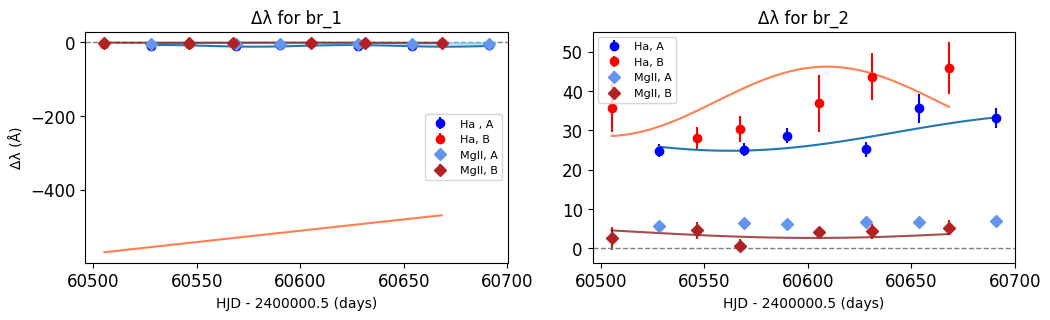

In [ ]:
t_sin = np.array(t) -np.array(t)[0]

period = 172.6
# period = 172.6/2
br_keys = ["br_1", "br_2"]

omega = 2*np.pi /period
# Define sinusoidal function to fit (with and without fixing the period)
def sine_func_fixp(t, A, phi, offset):
    return A * np.sin(omega* t + phi) + offset

def sine_func(t, A, omega, phi, offset):
    return A * np.sin(omega* t + phi) + offset

fits_1 = {}
fits_2 = {}
for br_key in br_keys:
    fits_1[br_key] = {}
    dwave_sin_a = np.array(results_1[br_key]["a_dwave"])
    dwave_sin_b = np.array(results_1[br_key]["b_dwave"])
    
    # Initial guess: amplitude, frequency, phase, vertical shift
    A_guess_a = (np.max(dwave_sin_a) - np.min(dwave_sin_a)) / 2
    D_guess_a = np.mean(dwave_sin_a)
    A_guess_b = (np.max(dwave_sin_b) - np.min(dwave_sin_b)) / 2
    D_guess_b = np.mean(dwave_sin_b)
    B_guess = 2*np.pi/period
    C_guess = 0
    guess_a = [A_guess_a, B_guess, C_guess, D_guess_a]
    guess_b = [A_guess_b, B_guess, C_guess, D_guess_b]

    # Fit the curves
    popt_a, pcov_a = curve_fit(sine_func, t, dwave_sin_a, p0=guess_a, maxfev=10000)
    popt_b, pcov_b = curve_fit(sine_func, t- 22.7, dwave_sin_b, p0=guess_b, maxfev=10000)

    # Generate fit line
    x_fit_a = np.linspace(min(t_sin), max(t_sin), 100)
    x_fit_b = np.linspace(min(t_sin)-22.7, max(t_sin) -22.7, 100)
    y_fit_a = sine_func(x_fit_a, *popt_a)
    y_fit_b = sine_func(x_fit_b, *popt_b)

    fits_1[br_key]["xfit_a"] = x_fit_a 
    fits_1[br_key]["yfit_a"] = y_fit_a
    fits_1[br_key]["xfit_b"] = x_fit_b
    fits_1[br_key]["yfit_b"] = y_fit_b

for br_key in br_keys:
    fits_2[br_key] = {}
    dwave_sin_a = np.array(results_2[br_key]["a_dwave"])
    dwave_sin_b = np.array(results_2[br_key]["b_dwave"])
    
    # Initial guess: amplitude, frequency, phase, vertical shift
    A_guess_a = (np.max(dwave_sin_a) - np.min(dwave_sin_a)) / 2
    D_guess_a = np.mean(dwave_sin_a)
    A_guess_b = (np.max(dwave_sin_b) - np.min(dwave_sin_b)) / 2
    D_guess_b = np.mean(dwave_sin_b)
    C_guess = 0
    guess_a = [A_guess_a, B_guess, C_guess, D_guess_a]
    guess_b = [A_guess_b, B_guess, C_guess, D_guess_b]

    # Fit the curves
    popt_a, pcov_a = curve_fit(sine_func, t, dwave_sin_a, p0=guess_a, maxfev=10000)
    popt_b, pcov_b = curve_fit(sine_func, t- 22.7, dwave_sin_b, p0=guess_b, maxfev=10000)

    # Generate fit line
    x_fit_a = np.linspace(min(t_sin), max(t_sin), 100)
    x_fit_b = np.linspace(min(t_sin)-22.7, max(t_sin) -22.7, 100)
    y_fit_a = sine_func(x_fit_a, *popt_a)
    y_fit_b = sine_func(x_fit_b, *popt_b)

    fits_2[br_key]["xfit_a"] = x_fit_a 
    fits_2[br_key]["yfit_a"] = y_fit_a
    fits_2[br_key]["xfit_b"] = x_fit_b
    fits_2[br_key]["yfit_b"] = y_fit_b


fig_dl, ax_dl = plt.subplots(nrows=1, ncols=2,figsize = (12,3))
ax_dl[0].errorbar(t, results_1["br_1"]["a_dwave"], yerr = results_1["br_1"]["a_dwave_err"], marker = 'o',linestyle='None', markersize = 6, label = rf'{line1} , A', color = 'blue')
ax_dl[0].errorbar(t-22.7, results_1["br_1"]["b_dwave"], yerr = results_1["br_1"]["b_dwave_err"], marker = 'o', linestyle='None', markersize = 6, label = rf'{line1}, B', color = 'red')
ax_dl[0].errorbar(t, results_2["br_1"]["a_dwave"], yerr = results_2["br_1"]["a_dwave_err"], marker = 'D', linestyle='None', markersize = 6, label = rf'{line2}, A', color = 'cornflowerblue')
ax_dl[0].errorbar(t-22.7, results_2["br_1"]["b_dwave"], yerr = results_2["br_1"]["b_dwave_err"], marker = 'D', linestyle='None', markersize = 6, label = rf'{line2}, B', color = 'firebrick')
ax_dl[0].axhline(y=0, color='gray', linestyle='--', linewidth=1)
ax_dl[0].plot(fits_1["br_1"]["xfit_a"] + np.array(t)[0], fits_1["br_1"]["yfit_a"])
ax_dl[0].plot(fits_2["br_1"]["xfit_a"] + np.array(t)[0], fits_2["br_1"]["yfit_a"], color = 'lightskyblue')
ax_dl[0].plot(fits_1["br_1"]["xfit_b"] + np.array(t)[0], fits_1["br_1"]["yfit_b"], color = 'coral')
ax_dl[0].plot(fits_2["br_1"]["xfit_b"] + np.array(t)[0], fits_2["br_1"]["yfit_b"], color = 'maroon',alpha=0.7)

ax_dl[1].errorbar(t, results_1["br_2"]["a_dwave"], yerr = results_1["br_2"]["a_dwave_err"], marker = 'o',linestyle='None', markersize = 6, label = rf'{line1}, A', color = 'blue')
ax_dl[1].errorbar(t-22.7, results_1["br_2"]["b_dwave"], yerr = results_1["br_2"]["b_dwave_err"], marker = 'o', linestyle='None', markersize = 6, label = rf'{line1}, B', color = 'red')
ax_dl[1].errorbar(t, results_2["br_2"]["a_dwave"], yerr = results_2["br_2"]["a_dwave_err"], marker = 'D', linestyle='None', markersize = 6, label = rf'{line2}, A', color = 'cornflowerblue')
ax_dl[1].errorbar(t-22.7, results_2["br_2"]["b_dwave"], yerr = results_2["br_2"]["b_dwave_err"], marker = 'D', linestyle='None', markersize = 6, label = rf'{line2}, B', color = 'firebrick')
ax_dl[1].axhline(y=0, color='gray', linestyle='--', linewidth=1)
ax_dl[1].plot(fits_1["br_2"]["xfit_a"] + np.array(t)[0], fits_1["br_2"]["yfit_a"])
#ax_dl[1].plot(fits_2["br_2"]["xfit_a"] + np.array(t)[0], fits_2["br_2"]["yfit_a"], color = 'lightskyblue')
ax_dl[1].plot(fits_1["br_2"]["xfit_b"] + np.array(t)[0], fits_1["br_2"]["yfit_b"], color = 'coral')
ax_dl[1].plot(fits_2["br_2"]["xfit_b"] + np.array(t)[0], fits_2["br_2"]["yfit_b"], color = 'maroon',alpha=0.7)

ax_dl[0].set_xlabel("HJD - 2400000.5 (days)")
ax_dl[1].set_xlabel("HJD - 2400000.5 (days)")
ax_dl[0].set_ylabel("Δλ (Å)")
ax_dl[0].set_title("Δλ for br_1")
ax_dl[1].set_title("Δλ for br_2")
ax_dl[0].tick_params(axis='both', labelsize=12)
ax_dl[1].tick_params(axis='both', labelsize=12)

ax_dl[0].legend(fontsize=8)
ax_dl[1].legend(fontsize=8)
plt.show()

### Fit periodic function to all data points for image A and B of one line (fixing the period)

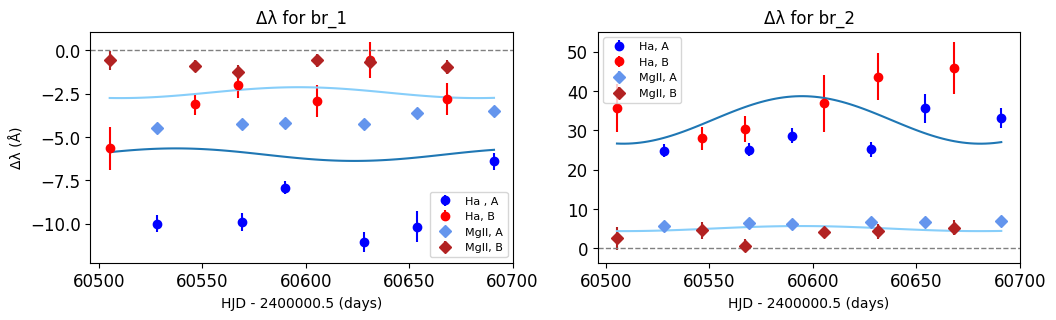

In [ ]:
t_sin = np.array(t) -np.array(t)[0]

period = 172.6
# period = 172.6/2
br_keys = ["br_1", "br_2"]

omega = 2*np.pi /period
# Define sinusoidal function to fit (with and without fixing the period)
def sine_func_fixp(t, A, phi, offset):
    return A * np.sin(omega* t + phi) + offset

def sine_func(t, A, omega, phi, offset):
    return A * np.sin(omega* t + phi) + offset

fits_1 = {}
fits_2 = {}
for br_key in br_keys:
    fits_1[br_key] = {}
    
    dwave_sin_a = np.array(results_1[br_key]["a_dwave"])
    dwave_sin_b = np.array(results_1[br_key]["b_dwave"])

    dw_all = np.column_stack((dwave_sin_b, dwave_sin_a)).ravel()
    t_all = np.column_stack((t - 22.7, t)).ravel()
    
    # Initial guess: amplitude, frequency, phase, vertical shift
    A_guess_a = (np.max(dw_all) - np.min(dw_all)) / 2
    D_guess_a = np.mean(dw_all)
    C_guess = 0
    guess_a = [A_guess_a, C_guess, D_guess_a]

    # Fit the curves
    popt_a, pcov_a = curve_fit(sine_func_fixp, t_all, dw_all, p0=guess_a)

    # Generate fit line
    x_fit_a = np.linspace(min(t_sin)-22.7, max(t_sin), 100)
    y_fit_a = sine_func_fixp(x_fit_a, *popt_a)

    fits_1[br_key]["xfit_a"] = x_fit_a 
    fits_1[br_key]["yfit_a"] = y_fit_a


for br_key in br_keys:
    fits_2[br_key] = {}
    dwave_sin_a = np.array(results_2[br_key]["a_dwave"])
    dwave_sin_b = np.array(results_2[br_key]["b_dwave"])

    dw_all = np.column_stack((dwave_sin_b, dwave_sin_a)).ravel()
    t_all = np.column_stack((t - 22.7, t)).ravel()
    
    # Initial guess: amplitude, frequency, phase, vertical shift
    A_guess_a = (np.max(dw_all) - np.min(dw_all)) / 2
    D_guess_a = np.mean(dw_all)
    C_guess = 0
    guess_a = [A_guess_a, C_guess, D_guess_a]

    # Fit the curves
    popt_a, pcov_a = curve_fit(sine_func_fixp, t_all, dw_all, p0=guess_a)

    # Generate fit line
    x_fit_a = np.linspace(min(t_sin)-22.7, max(t_sin), 100)
    y_fit_a = sine_func_fixp(x_fit_a, *popt_a)

    fits_2[br_key]["xfit_a"] = x_fit_a 
    fits_2[br_key]["yfit_a"] = y_fit_a


fig_dl, ax_dl = plt.subplots(nrows=1, ncols=2,figsize = (12,3))
ax_dl[0].errorbar(t, results_1["br_1"]["a_dwave"], yerr = results_1["br_1"]["a_dwave_err"], marker = 'o',linestyle='None', markersize = 6, label = rf'{line1} , A', color = 'blue')
ax_dl[0].errorbar(t-22.7, results_1["br_1"]["b_dwave"], yerr = results_1["br_1"]["b_dwave_err"], marker = 'o', linestyle='None', markersize = 6, label = rf'{line1}, B', color = 'red')
ax_dl[0].errorbar(t, results_2["br_1"]["a_dwave"], yerr = results_2["br_1"]["a_dwave_err"], marker = 'D', linestyle='None', markersize = 6, label = rf'{line2}, A', color = 'cornflowerblue')
ax_dl[0].errorbar(t-22.7, results_2["br_1"]["b_dwave"], yerr = results_2["br_1"]["b_dwave_err"], marker = 'D', linestyle='None', markersize = 6, label = rf'{line2}, B', color = 'firebrick')
ax_dl[0].axhline(y=0, color='gray', linestyle='--', linewidth=1)
ax_dl[0].plot(fits_1["br_1"]["xfit_a"] + np.array(t)[0], fits_1["br_1"]["yfit_a"])
ax_dl[0].plot(fits_2["br_1"]["xfit_a"] + np.array(t)[0], fits_2["br_1"]["yfit_a"], color = 'lightskyblue')

ax_dl[1].errorbar(t, results_1["br_2"]["a_dwave"], yerr = results_1["br_2"]["a_dwave_err"], marker = 'o',linestyle='None', markersize = 6, label = rf'{line1}, A', color = 'blue')
ax_dl[1].errorbar(t-22.7, results_1["br_2"]["b_dwave"], yerr = results_1["br_2"]["b_dwave_err"], marker = 'o', linestyle='None', markersize = 6, label = rf'{line1}, B', color = 'red')
ax_dl[1].errorbar(t, results_2["br_2"]["a_dwave"], yerr = results_2["br_2"]["a_dwave_err"], marker = 'D', linestyle='None', markersize = 6, label = rf'{line2}, A', color = 'cornflowerblue')
ax_dl[1].errorbar(t-22.7, results_2["br_2"]["b_dwave"], yerr = results_2["br_2"]["b_dwave_err"], marker = 'D', linestyle='None', markersize = 6, label = rf'{line2}, B', color = 'firebrick')
ax_dl[1].axhline(y=0, color='gray', linestyle='--', linewidth=1)
ax_dl[1].plot(fits_1["br_2"]["xfit_a"] + np.array(t)[0], fits_1["br_2"]["yfit_a"], )
ax_dl[1].plot(fits_2["br_2"]["xfit_a"] + np.array(t)[0], fits_2["br_2"]["yfit_a"], color = 'lightskyblue')

ax_dl[0].set_xlabel("HJD - 2400000.5 (days)")
ax_dl[1].set_xlabel("HJD - 2400000.5 (days)")
ax_dl[0].set_ylabel("Δλ (Å)")
ax_dl[0].set_title("Δλ for br_1")
ax_dl[1].set_title("Δλ for br_2")
ax_dl[0].tick_params(axis='both', labelsize=12)
ax_dl[1].tick_params(axis='both', labelsize=12)

ax_dl[0].legend(fontsize=8)
ax_dl[1].legend(fontsize=8)
plt.show()

### Fit all data points for image A and B (without fixing period)

[ 5.61030049e-01  5.21221511e-02 -9.50724691e+02 -5.99103106e+00]
[6.22932265e+00 3.11284855e-02 3.18772261e+02 3.28462048e+01]


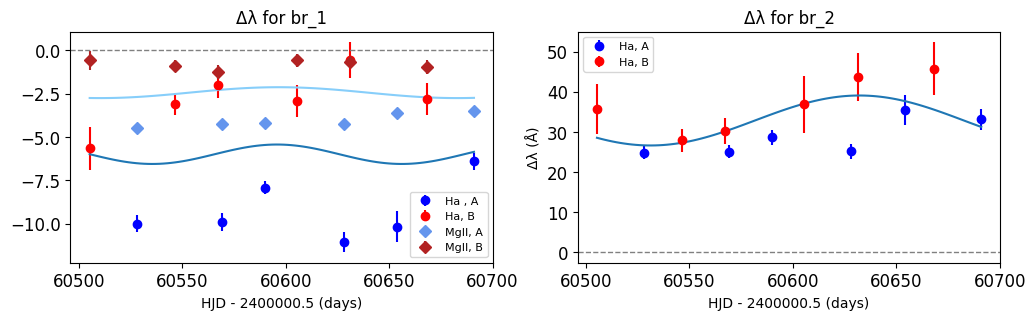

In [ ]:
t_sin = np.array(t) -np.array(t)[0]

period = 172.6
# period = 172.6/2
br_keys = ["br_1", "br_2"]

omega = 2*np.pi /period
# Define sinusoidal function to fit (with and without fixing the period)
def sine_func_fixp(t, A, phi, offset):
    return A * np.sin(omega* t + phi) + offset

def sine_func(t, A, omega, phi, offset):
    return A * np.sin(omega* t + phi) + offset

fits_1 = {}
fits_2 = {}
for br_key in br_keys:
    fits_1[br_key] = {}
    
    dwave_sin_a = np.array(results_1[br_key]["a_dwave"])
    dwave_sin_b = np.array(results_1[br_key]["b_dwave"])

    dw_all = np.column_stack((dwave_sin_b, dwave_sin_a)).ravel()
    t_all = np.column_stack((t - 22.7, t)).ravel()
    
    # Initial guess: amplitude, frequency, phase, vertical shift
    A_guess_a = (np.max(dw_all) - np.min(dw_all)) / 2
    B_guess = omega
    D_guess_a = np.mean(dw_all)
    C_guess = 0
    guess_a = [A_guess_a,B_guess, C_guess, D_guess_a]

    # Fit the curves
    popt_a, pcov_a = curve_fit(sine_func, t_all, dw_all, p0=guess_a)

    # Generate fit line
    x_fit_a = np.linspace(min(t_sin)-22.7, max(t_sin), 100)
    y_fit_a = sine_func(x_fit_a, *popt_a)

    fits_1[br_key]["xfit_a"] = x_fit_a 
    fits_1[br_key]["yfit_a"] = y_fit_a

    #print(popt_a)

for br_key in br_keys:
    fits_2[br_key] = {}
    dwave_sin_a = np.array(results_2[br_key]["a_dwave"])
    dwave_sin_b = np.array(results_2[br_key]["b_dwave"])

    dw_all = np.column_stack((dwave_sin_b, dwave_sin_a)).ravel()
    t_all = np.column_stack((t - 22.7, t)).ravel()
    
    # Initial guess: amplitude, frequency, phase, vertical shift
    A_guess_a = (np.max(dw_all) - np.min(dw_all)) / 2
    D_guess_a = np.mean(dw_all)
    C_guess = 0
    guess_a = [A_guess_a, C_guess, D_guess_a]

    # Fit the curves
    popt_a, pcov_a = curve_fit(sine_func_fixp, t_all, dw_all, p0=guess_a)

    # Generate fit line
    x_fit_a = np.linspace(min(t_sin)-22.7, max(t_sin), 100)
    y_fit_a = sine_func_fixp(x_fit_a, *popt_a)

    fits_2[br_key]["xfit_a"] = x_fit_a 
    fits_2[br_key]["yfit_a"] = y_fit_a



fig_dl, ax_dl = plt.subplots(nrows=1, ncols=2,figsize = (12,3))
ax_dl[0].errorbar(t, results_1["br_1"]["a_dwave"], yerr = results_1["br_1"]["a_dwave_err"], marker = 'o',linestyle='None', markersize = 6, label = rf'{line1} , A', color = 'blue')
ax_dl[0].errorbar(t-22.7, results_1["br_1"]["b_dwave"], yerr = results_1["br_1"]["b_dwave_err"], marker = 'o', linestyle='None', markersize = 6, label = rf'{line1}, B', color = 'red')
ax_dl[0].errorbar(t, results_2["br_1"]["a_dwave"], yerr = results_2["br_1"]["a_dwave_err"], marker = 'D', linestyle='None', markersize = 6, label = rf'{line2}, A', color = 'cornflowerblue')
ax_dl[0].errorbar(t-22.7, results_2["br_1"]["b_dwave"], yerr = results_2["br_1"]["b_dwave_err"], marker = 'D', linestyle='None', markersize = 6, label = rf'{line2}, B', color = 'firebrick')
ax_dl[0].axhline(y=0, color='gray', linestyle='--', linewidth=1)
ax_dl[0].plot(fits_1["br_1"]["xfit_a"] + np.array(t)[0], fits_1["br_1"]["yfit_a"])
ax_dl[0].plot(fits_2["br_1"]["xfit_a"] + np.array(t)[0], fits_2["br_1"]["yfit_a"], color = 'lightskyblue')

ax_dl[1].errorbar(t, results_1["br_2"]["a_dwave"], yerr = results_1["br_2"]["a_dwave_err"], marker = 'o',linestyle='None', markersize = 6, label = rf'{line1}, A', color = 'blue')
ax_dl[1].errorbar(t-22.7, results_1["br_2"]["b_dwave"], yerr = results_1["br_2"]["b_dwave_err"], marker = 'o', linestyle='None', markersize = 6, label = rf'{line1}, B', color = 'red')
#ax_dl[1].errorbar(t, results_2["br_2"]["a_dwave"], yerr = results_2["br_2"]["a_dwave_err"], marker = 'D', linestyle='None', markersize = 6, label = rf'{line2}, A', color = 'cornflowerblue')
#ax_dl[1].errorbar(t-22.7, results_2["br_2"]["b_dwave"], yerr = results_2["br_2"]["b_dwave_err"], marker = 'D', linestyle='None', markersize = 6, label = rf'{line2}, B', color = 'firebrick')
ax_dl[1].axhline(y=0, color='gray', linestyle='--', linewidth=1)
ax_dl[1].plot(fits_1["br_2"]["xfit_a"] + np.array(t)[0], fits_1["br_2"]["yfit_a"] )
#ax_dl[1].plot(fits_2["br_2"]["xfit_a"] + np.array(t)[0], fits_2["br_2"]["yfit_a"], color = 'lightskyblue')

ax_dl[0].set_xlabel("HJD - 2400000.5 (days)")
ax_dl[1].set_xlabel("HJD - 2400000.5 (days)")
ax_dl[1].set_ylabel("Δλ (Å)")
ax_dl[0].set_title("Δλ for br_1")
ax_dl[1].set_title("Δλ for br_2")
ax_dl[0].tick_params(axis='both', labelsize=12)
ax_dl[1].tick_params(axis='both', labelsize=12)

ax_dl[0].legend(fontsize=8)
ax_dl[1].legend(fontsize=8)
plt.show()